# LEVEL 1 (SPASIAL)

Dataset: Level 1 – UK Co-Benefits Atlas

1.   Fokus : Air Quality Co-benefit
2.   Tool: Google Colab

## 1️⃣ IMPORT LIBRARY

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

plt.rcParams.update({
    "figure.dpi": 140,
    "savefig.dpi": 300,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.titlesize": 14,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Palet non-default (tanpa biru default)
COL = {
    "orange": "tab:orange",
    "green":  "tab:green",
    "purple": "tab:purple",
    "red":    "tab:red",
    "gray":   "0.25",
}

def hist_pretty(series, title, xlabel, ylabel, bins=40, clip_q=0.99, fmt="{x:,.2f}",
                bar_color=COL["orange"], mean_color=COL["gray"], median_color=COL["green"]):
    s = pd.to_numeric(pd.Series(series), errors="coerce").dropna()

    # zoom p99 biar outlier/tail nggak “narik” histogram
    if clip_q is not None:
        lo, hi = s.min(), s.quantile(clip_q)
        s_plot = s.clip(lo, hi)
        xlim = (lo, hi)
    else:
        s_plot = s
        xlim = None

    mean, med = s.mean(), s.median()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(s_plot, bins=bins, color=bar_color, edgecolor="white", linewidth=0.6, alpha=0.9)

    ax.axvline(mean, linestyle="--", linewidth=1.2, color=mean_color, label=f"Mean = {mean:.3f}")
    ax.axvline(med,  linestyle="-",  linewidth=1.2, color=median_color, label=f"Median = {med:.3f}")

    ax.set_title(title, weight="bold")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter(fmt))
    if xlim is not None:
        ax.set_xlim(xlim)

    ax.text(
        0.98, 0.95,
        f"N={len(s):,}\nmin={s.min():.3f}\nmax={s.max():.3f}",
        transform=ax.transAxes, ha="right", va="top"
    )

    plt.tight_layout()
    plt.show()


## 2️⃣ LOAD DATASET LEVEL 1

In [ ]:
df_lvl1 = pd.read_excel("Level_1.xlsx")

display(df_lvl1.head())
print("Shape Level 1:", df_lvl1.shape)


,small_area,air_quality,congestion,dampness,diet_change,excess_cold,excess_heat,hassle_costs,noise,physical_activity,road_repairs,road_safety,sum
0,E01000001,1.216085,-0.369011,0.001297,0.128954,0.024851,2.700000e-07,-2.167971,1.147270,2.843469,-0.004712,-0.050622,2.769611
1,E01000002,1.136227,-0.344781,0.001281,0.120487,0.021732,2.390000e-07,-2.025623,1.073049,2.144986,-0.004402,-0.047298,2.075657
2,E01000003,1.292019,-0.391524,0.002419,0.136821,0.038085,4.090000e-07,-2.300241,1.217813,3.880668,-0.004999,-0.053711,3.817350
3,E01000005,1.131235,-0.344138,0.000606,0.120262,0.009138,1.320000e-07,-2.021843,1.067516,0.575438,-0.004394,-0.047210,0.486609
4,E01000006,1.296972,-0.393025,0.010851,0.137346,0.154956,2.770000e-06,-2.309059,1.245932,1.562526,-0.005018,-0.053917,1.647567


Shape Level 1: (46426, 13)


## 3️⃣ CEK & BERSIHKAN DATA

In [ ]:
print("\nINFO Level 1:")
df_lvl1.info()

print("\nMissing values per kolom Level 1:")
display(df_lvl1.isna().sum())



INFO Level 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46426 entries, 0 to 46425
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   small_area         46426 non-null  object 
 1   air_quality        46426 non-null  float64
 2   congestion         46426 non-null  float64
 3   dampness           46426 non-null  float64
 4   diet_change        46426 non-null  float64
 5   excess_cold        46426 non-null  float64
 6   excess_heat        46426 non-null  float64
 7   hassle_costs       46423 non-null  float64
 8   noise              46426 non-null  float64
 9   physical_activity  46426 non-null  float64
 10  road_repairs       46426 non-null  float64
 11  road_safety        46426 non-null  float64
 12  sum                46423 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.6+ MB

Missing values per kolom Level 1:


,0
small_area,0
air_quality,0
congestion,0
dampness,0
diet_change,0
excess_cold,0
excess_heat,0
hassle_costs,3
noise,0
physical_activity,0


## 4️⃣ FILTER CO-BENEFIT: AIR QUALITY

In [ ]:
df_air_lvl1 = df_lvl1.loc[:, ["small_area", "air_quality"]].copy()

df_air_lvl1["air_quality"] = pd.to_numeric(df_air_lvl1["air_quality"], errors="coerce")
df_air_lvl1 = df_air_lvl1.dropna(subset=["small_area", "air_quality"]).reset_index(drop=True)

print("\nINFO df_air_lvl1:")
df_air_lvl1.info()

print("\nDESKRIPTIF df_air_lvl1:")
display(df_air_lvl1["air_quality"].describe())



INFO df_air_lvl1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46426 entries, 0 to 46425
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   small_area   46426 non-null  object 
 1   air_quality  46426 non-null  float64
dtypes: float64(1), object(1)
memory usage: 725.5+ KB

DESKRIPTIF df_air_lvl1:


,air_quality
count,46426.000000
mean,1.039491
std,0.393978
min,0.000000
25%,0.842491
50%,1.077807
75%,1.261198
max,6.740000


## 5️⃣ ANALISIS SPASIAL SEDERHANA

In [ ]:
mean_val = df_air_lvl1["air_quality"].mean()
median_val = df_air_lvl1["air_quality"].median()
min_val = df_air_lvl1["air_quality"].min()
max_val = df_air_lvl1["air_quality"].max()

print("\nRingkasan Level 1:")
print(f"Mean   : {mean_val:.6f}")
print(f"Median : {median_val:.6f}")
print(f"Min    : {min_val:.6f}")
print(f"Max    : {max_val:.6f}")
print(f"Gap(all): {(max_val - min_val):.6f}")



Ringkasan Level 1:
Mean   : 1.039491
Median : 1.077807
Min    : 0.000000
Max    : 6.740000
Gap(all): 6.740000


## 6️⃣ VISUALISASI DISTRIBUSI (HISTOGRAM) — SELURUH UK

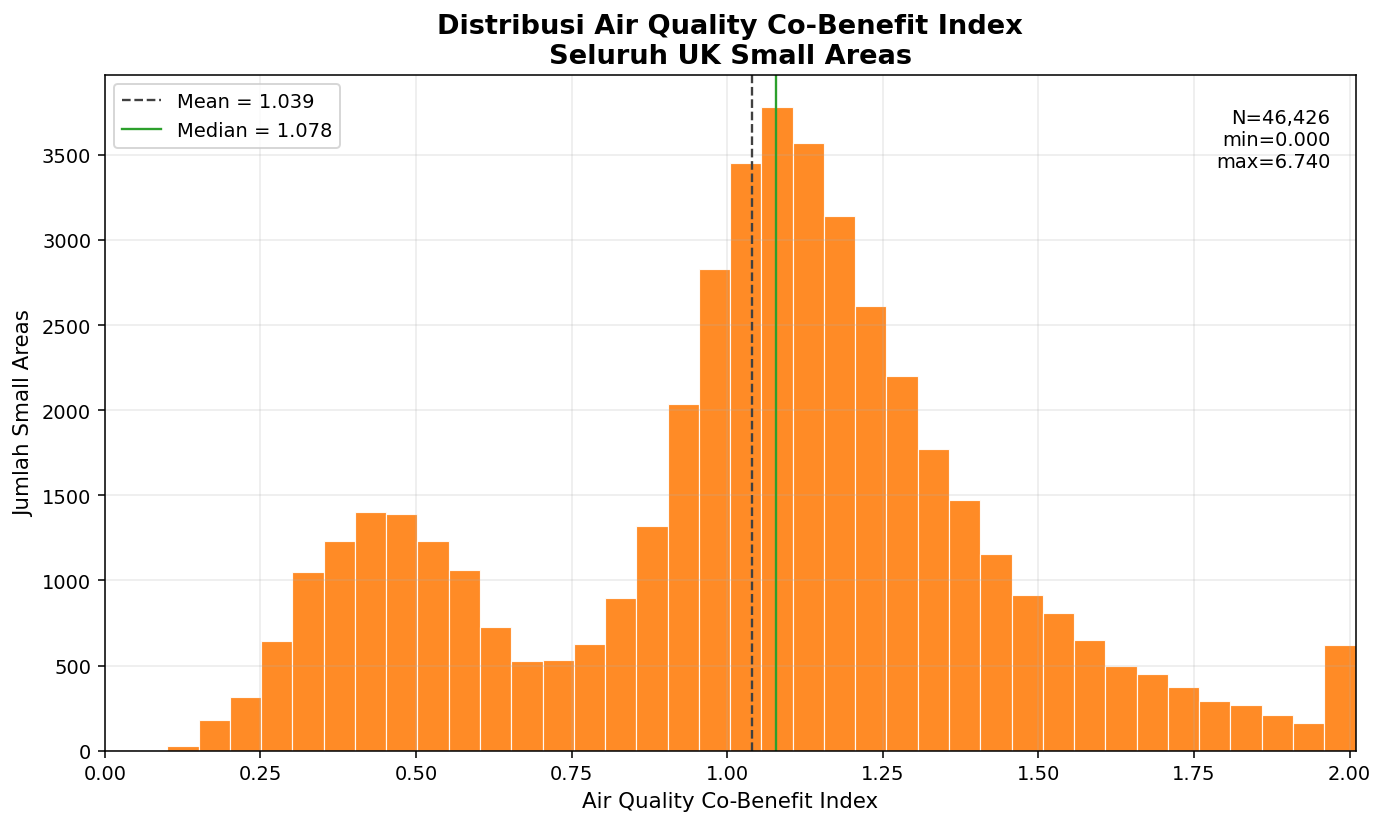

In [ ]:
hist_pretty(
    df_air_lvl1["air_quality"],
    title="Distribusi Air Quality Co-Benefit Index\nSeluruh UK Small Areas",
    xlabel="Air Quality Co-Benefit Index",
    ylabel="Jumlah Small Areas",
    bins=40,
    clip_q=0.99,
    fmt="{x:,.2f}",
    bar_color=COL["orange"]     # <- warna bar
)


# LEVEL 2 (CO-BENEFIT PENDUKUNG)

Dataset: Level 2 – UK Co-Benefits Atlas
1. Fungsi: Pendalaman & relasi antar co-benefits
2. Output: Visual pendukung + insight korelasi
3. Tool: Google Colab

## 1️⃣ Load Dataset

In [7]:
df_lvl2 = pd.read_excel("Level_2.xlsx")

display(df_lvl2.head())
print("Shape Level 2:", df_lvl2.shape)


,small_area,co-benefit_type,2025,2026,2027,2028,2029,2030,2031,2032,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,sum
0,E01000001,air_quality,0.003375,0.003706,0.006998,0.008777,0.010981,0.014253,0.017711,0.022410,...,0.070505,0.073557,0.076150,0.078284,0.079530,0.079614,0.079098,0.078548,0.078011,1.216085
1,E01000001,congestion,0.005570,0.009543,0.011914,0.013247,0.013655,0.014798,0.011850,0.008587,...,-0.029961,-0.032100,-0.034378,-0.036939,-0.040992,-0.042819,-0.044712,-0.046119,-0.048975,-0.369011
2,E01000001,dampness,0.000000,0.000000,0.000032,0.000032,0.000032,0.000006,0.000004,0.000005,...,0.000076,0.000085,0.000085,0.000082,0.000082,0.000081,0.000081,0.000080,0.000080,0.001297
3,E01000001,diet_change,0.000000,0.000000,0.006080,0.006109,0.006064,0.005997,0.005924,0.005848,...,0.005118,0.005049,0.004982,0.004915,0.004849,0.004783,0.004717,0.004652,0.004587,0.128954
4,E01000001,excess_cold,0.000000,0.000000,0.000002,0.000038,0.000044,0.000055,0.000064,0.000236,...,0.001401,0.001903,0.001895,0.001887,0.001859,0.001861,0.002016,0.001987,0.001984,0.024851


Shape Level 2: (557112, 29)


## 2️⃣ Cek dan Bersihkan Data

In [8]:
print("\nINFO Level 2:")
df_lvl2.info()

print("\nMissing values per kolom Level 2:")
display(df_lvl2.isna().sum())



INFO Level 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557112 entries, 0 to 557111
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   small_area       557112 non-null  object 
 1   co-benefit_type  557112 non-null  object 
 2   2025             557106 non-null  float64
 3   2026             557106 non-null  float64
 4   2027             557106 non-null  float64
 5   2028             557106 non-null  float64
 6   2029             557106 non-null  float64
 7   2030             557106 non-null  float64
 8   2031             557106 non-null  float64
 9   2032             557106 non-null  float64
 10  2033             557106 non-null  float64
 11  2034             557106 non-null  float64
 12  2035             557106 non-null  float64
 13  2036             557106 non-null  float64
 14  2037             557106 non-null  float64
 15  2038             557106 non-null  float64
 16  2039             557106

,0
small_area,0
co-benefit_type,0
2025,6
2026,6
2027,6
2028,6
2029,6
2030,6
2031,6
2032,6


## 3️⃣ Filter CO-Benefit

In [9]:
df_filtered_level2 = df_lvl2[df_lvl2["small_area"] == "E01028521"].copy()

print("\nINFO df_filtered_level2:")
df_filtered_level2.info()

# contoh: lihat row air_quality
air_quality_data = df_filtered_level2[df_filtered_level2["co-benefit_type"] == "air_quality"]
display(air_quality_data)



INFO df_filtered_level2:
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 324900 to 324911
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   small_area       12 non-null     object 
 1   co-benefit_type  12 non-null     object 
 2   2025             12 non-null     float64
 3   2026             12 non-null     float64
 4   2027             12 non-null     float64
 5   2028             12 non-null     float64
 6   2029             12 non-null     float64
 7   2030             12 non-null     float64
 8   2031             12 non-null     float64
 9   2032             12 non-null     float64
 10  2033             12 non-null     float64
 11  2034             12 non-null     float64
 12  2035             12 non-null     float64
 13  2036             12 non-null     float64
 14  2037             12 non-null     float64
 15  2038             12 non-null     float64
 16  2039             12 non-null     f

,small_area,co-benefit_type,2025,2026,2027,2028,2029,2030,2031,2032,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,sum
324900,E01028521,air_quality,0.02,0.03,0.03,0.04,0.05,0.07,0.09,0.12,...,0.39,0.41,0.43,0.44,0.45,0.45,0.44,0.44,0.44,6.74


## 4️⃣ Ambil data air_quality (Level 2) + pilih kolom tahun 2025–2050

In [10]:
df_air_lvl2 = df_lvl2[df_lvl2["co-benefit_type"] == "air_quality"].copy()

# ambil kolom tahun (kadang Excel kebaca int, kadang string)
year_cols = []
for c in df_air_lvl2.columns:
    if isinstance(c, int) and 2025 <= c <= 2050:
        year_cols.append(c)
    elif isinstance(c, str) and c.isdigit() and 2025 <= int(c) <= 2050:
        year_cols.append(c)

year_cols = sorted(year_cols, key=lambda x: int(x))
print("Jumlah kolom tahun:", len(year_cols), "| contoh:", year_cols[:5], "...", year_cols[-3:])


Jumlah kolom tahun: 26 | contoh: [2025, 2026, 2027, 2028, 2029] ... [2048, 2049, 2050]


## 5️⃣ (A) Histogram nilai tahunan 2025–2050 (tanpa sum)

In [11]:
# 5️⃣ (A) Histogram nilai tahunan 2025–2050 (tanpa sum)
df_air_long = df_air_lvl2.melt(
    id_vars=["small_area"],
    value_vars=year_cols,
    var_name="year",
    value_name="air_quality_value"
)

# optional tapi aman
df_air_long["air_quality_value"] = pd.to_numeric(df_air_long["air_quality_value"], errors="coerce")


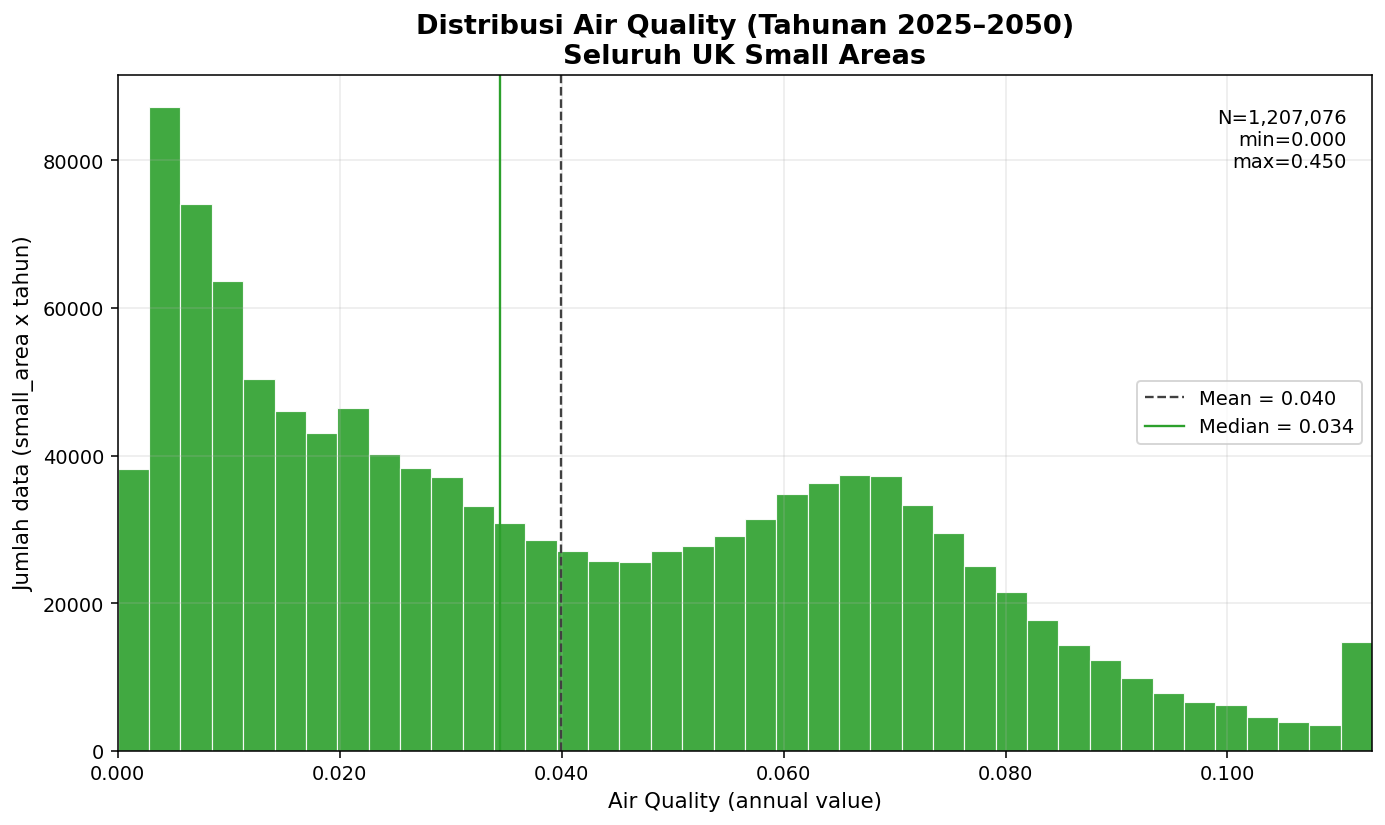

In [12]:
hist_pretty(
    df_air_long["air_quality_value"],
    title="Distribusi Air Quality (Tahunan 2025–2050)\nSeluruh UK Small Areas",
    xlabel="Air Quality (annual value)",
    ylabel="Jumlah data (small_area x tahun)",
    bins=40,
    clip_q=0.99,
    fmt="{x:,.3f}",
    bar_color=COL["green"]
)


## 6️⃣ (B) Histogram sum Level 2 (total 2025–2050)

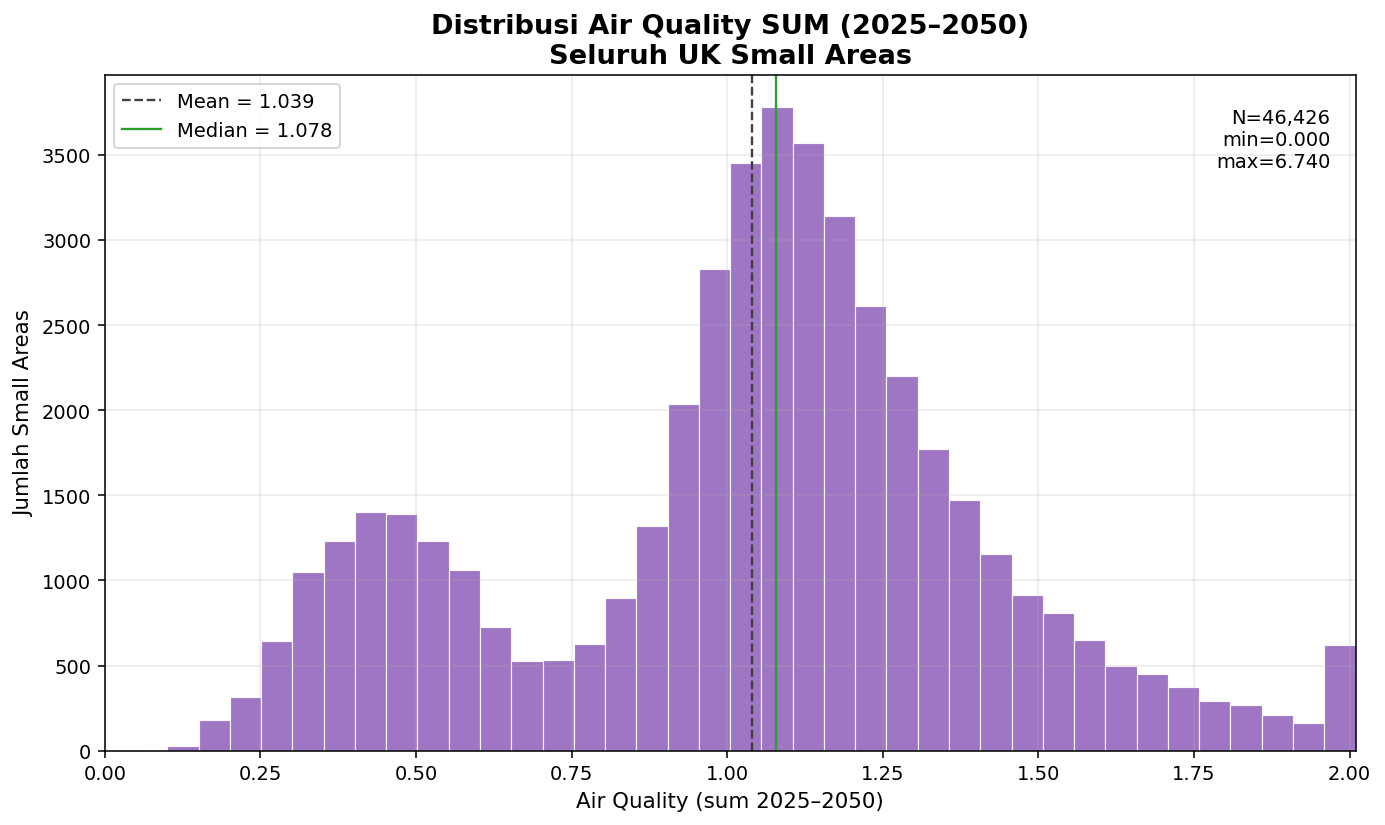

In [13]:
hist_pretty(
    df_air_lvl2["sum"],
    title="Distribusi Air Quality SUM (2025–2050)\nSeluruh UK Small Areas",
    xlabel="Air Quality (sum 2025–2050)",
    ylabel="Jumlah Small Areas",
    bins=40,
    clip_q=0.99,
    fmt="{x:,.2f}",
    bar_color=COL["purple"]
)


## 7️⃣ GAP per small_area (Level 2) — khusus antar tahun (tanpa sum)

In [14]:
tmp = df_air_lvl2.set_index("small_area")[year_cols]
gap_small_area_year = pd.DataFrame({
    "min": tmp.min(axis=1),
    "max": tmp.max(axis=1),
})
gap_small_area_year["gap"] = gap_small_area_year["max"] - gap_small_area_year["min"]

print("\nContoh gap antar tahun (Level 2) per small_area:")
display(gap_small_area_year.head())



Contoh gap antar tahun (Level 2) per small_area:


,min,max,gap
small_area,,,
E01000001,0.003375,0.079614,0.076239
E01000002,0.003153,0.074387,0.071233
E01000003,0.003581,0.084472,0.080891
E01000005,0.003147,0.074248,0.071101
E01000006,0.003594,0.084795,0.081201


# FINAL (INTEGRASI LEVEL 1 + LEVEL 2)
Tujuan: Menggabungkan ringkasan Level 1 dengan time-series Level 2 supaya siap untuk:
- ranking & segmentasi prioritas
- analisis tren (2025–2050)
- korelasi antar co-benefits
- output final (CSV/Excel)


## 1️⃣ BENTUK TABEL WIDE LEVEL 2 + MERGE KE LEVEL 1


In [15]:
df_air_lvl2_wide = df_air_lvl2[["small_area", "sum"] + year_cols].copy()
df_air_lvl2_wide = df_air_lvl2_wide.rename(columns={"sum": "air_quality_sum_2025_2050"})

# safety kalau ada duplikat
if df_air_lvl2_wide["small_area"].duplicated().any():
    df_air_lvl2_wide = df_air_lvl2_wide.groupby("small_area", as_index=False).first()

df_master = df_lvl1.merge(df_air_lvl2_wide, on="small_area", how="left")

print("Shape df_master:", df_master.shape)
print("Null air_quality_sum_2025_2050:", df_master["air_quality_sum_2025_2050"].isna().sum())
display(df_master.head())


Shape df_master: (46426, 40)
Null air_quality_sum_2025_2050: 0


,small_area,air_quality,congestion,dampness,diet_change,excess_cold,excess_heat,hassle_costs,noise,physical_activity,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,E01000001,1.216085,-0.369011,0.001297,0.128954,0.024851,2.700000e-07,-2.167971,1.147270,2.843469,...,0.067028,0.070505,0.073557,0.076150,0.078284,0.079530,0.079614,0.079098,0.078548,0.078011
1,E01000002,1.136227,-0.344781,0.001281,0.120487,0.021732,2.390000e-07,-2.025623,1.073049,2.144986,...,0.062627,0.065875,0.068728,0.071150,0.073144,0.074308,0.074387,0.073905,0.073390,0.072889
2,E01000003,1.292019,-0.391524,0.002419,0.136821,0.038085,4.090000e-07,-2.300241,1.217813,3.880668,...,0.071117,0.074806,0.078045,0.080796,0.083061,0.084382,0.084472,0.083924,0.083340,0.082771
3,E01000005,1.131235,-0.344138,0.000606,0.120262,0.009138,1.320000e-07,-2.021843,1.067516,0.575438,...,0.062510,0.065752,0.068599,0.071017,0.073008,0.074169,0.074248,0.073767,0.073253,0.072753
4,E01000006,1.296972,-0.393025,0.010851,0.137346,0.154956,2.770000e-06,-2.309059,1.245932,1.562526,...,0.071390,0.075093,0.078344,0.081105,0.083379,0.084705,0.084795,0.084246,0.083659,0.083088


## 1️⃣ BENTUK TABEL WIDE LEVEL 2 + MERGE KE LEVEL 1


In [16]:
df_master["diff_L1_vs_L2sum"] = df_master["air_quality"] - df_master["air_quality_sum_2025_2050"]

display(df_master["diff_L1_vs_L2sum"].describe())
print("Jumlah diff != 0:", (df_master["diff_L1_vs_L2sum"].abs() > 1e-9).sum())


,diff_L1_vs_L2sum
count,46426.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Jumlah diff != 0: 0


## 3️⃣ FITUR TURUNAN: MIN/MAX/GAP + YEAR OF MAX + SLOPE TREND


In [17]:
# 0) pastikan year_cols yang dipakai memang ada di df_master
year_cols_ok = [c for c in year_cols if c in df_master.columns]
missing = set(year_cols) - set(year_cols_ok)
if missing:
    print("WARNING: year_cols tidak ada di df_master:", sorted(list(missing))[:10], "...")
print("Jumlah kolom tahun dipakai:", len(year_cols_ok))

# 1) ambil time-series TANPA set_index (biar assignment aman)
ts = df_master[year_cols_ok].apply(pd.to_numeric, errors="coerce")

# 2) MIN / MAX / GAP
df_master["min_annual"] = ts.min(axis=1, skipna=True)
df_master["max_annual"] = ts.max(axis=1, skipna=True)
df_master["gap_annual"] = df_master["max_annual"] - df_master["min_annual"]

# 3) YEAR OF MAX / MIN
df_master["year_of_max"] = ts.idxmax(axis=1)
df_master["year_of_min"] = ts.idxmin(axis=1)

# rapihin jadi int year (kalau label kolom tahun string/int)
df_master["year_of_max"] = df_master["year_of_max"].apply(lambda v: int(str(v)) if pd.notna(v) else np.nan)
df_master["year_of_min"] = df_master["year_of_min"].apply(lambda v: int(str(v)) if pd.notna(v) else np.nan)

# 4) SLOPE TREND (OLS slope sederhana, robust untuk NaN)
Y = ts.to_numpy(dtype=float)
x = np.arange(len(year_cols_ok), dtype=float)
x_c = x - x.mean()
den = np.sum(x_c**2)

valid_n = np.sum(~np.isnan(Y), axis=1)
y_mean = np.nanmean(Y, axis=1, keepdims=True)

slope = np.nansum((Y - y_mean) * x_c, axis=1) / den
slope[valid_n < 2] = np.nan  # kalau valid tahun < 2, slope tidak meaningful

df_master["slope_trend"] = slope

# 5) cek hasil
display(df_master[["small_area","air_quality","min_annual","max_annual","gap_annual","year_of_max","year_of_min","slope_trend"]].head())
print("NaN check:",
      "min", df_master["min_annual"].isna().sum(),
      "| max", df_master["max_annual"].isna().sum(),
      "| year_max", df_master["year_of_max"].isna().sum(),
      "| slope", df_master["slope_trend"].isna().sum())


Jumlah kolom tahun dipakai: 26


,small_area,air_quality,min_annual,max_annual,gap_annual,year_of_max,year_of_min,slope_trend
0,E01000001,1.216085,0.003375,0.079614,0.076239,2047,2025,0.003656
1,E01000002,1.136227,0.003153,0.074387,0.071233,2047,2025,0.003416
2,E01000003,1.292019,0.003581,0.084472,0.080891,2047,2025,0.003866
3,E01000005,1.131235,0.003147,0.074248,0.071101,2047,2025,0.003430
4,E01000006,1.296972,0.003594,0.084795,0.081201,2047,2025,0.003881


NaN check: min 0 | max 0 | year_max 0 | slope 0


## 4️⃣ SEGMENTASI PRIORITAS: QUADRANT TOTAL vs TREND


In [18]:
cut_total = df_master["air_quality"].median()
cut_trend = df_master["slope_trend"].median()

def quadrant(row):
    total = "HighTotal" if row["air_quality"] >= cut_total else "LowTotal"
    trend = "HighTrend" if row["slope_trend"] >= cut_trend else "LowTrend"
    return f"{total}-{trend}"

df_master["quadrant"] = df_master.apply(quadrant, axis=1)

display(df_master["quadrant"].value_counts())


,count
quadrant,
HighTotal-HighTrend,21807
LowTotal-LowTrend,21801
HighTotal-LowTrend,1412
LowTotal-HighTrend,1406


## 5️⃣ PLOT SCATTER QUADRANT


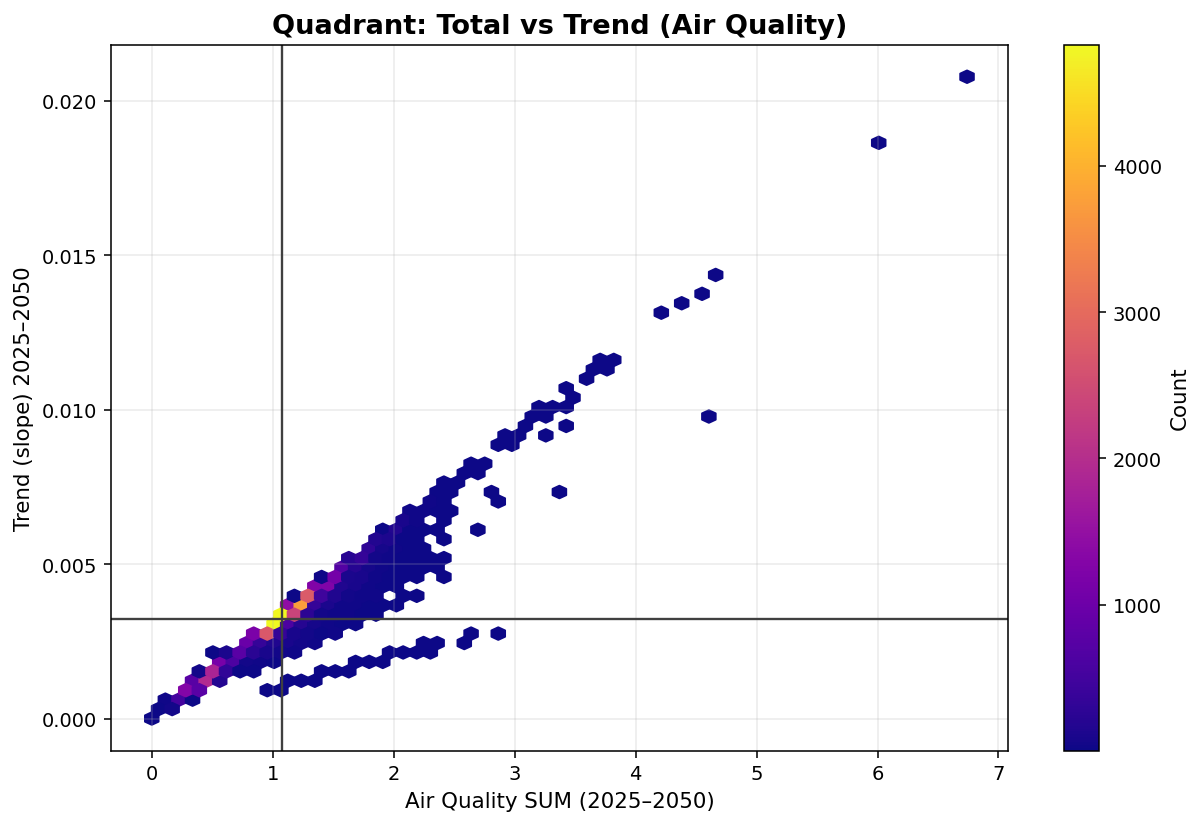

In [19]:
cut_total = df_master["air_quality"].median()
cut_trend = df_master["slope_trend"].median()

x = pd.to_numeric(df_master["air_quality"], errors="coerce")
y = pd.to_numeric(df_master["slope_trend"], errors="coerce")
m = x.notna() & y.notna()

fig, ax = plt.subplots(figsize=(9, 6))
hb = ax.hexbin(x[m], y[m], gridsize=60, mincnt=1, cmap="plasma")  # <- non-biru
fig.colorbar(hb, ax=ax, label="Count")

ax.axvline(cut_total, linewidth=1.2, color=COL["gray"])
ax.axhline(cut_trend, linewidth=1.2, color=COL["gray"])

ax.set_title("Quadrant: Total vs Trend (Air Quality)", weight="bold")
ax.set_xlabel("Air Quality SUM (2025–2050)")
ax.set_ylabel("Trend (slope) 2025–2050")
plt.tight_layout()
plt.show()


## 6️⃣ OUTPUT FINAL: MASTER (WIDE) + PANEL (LONG) + SAVE


In [20]:
# (13 tahun + 13 tahun) biar muat Excel per sheet
year_blocks = [(2025, 2037), (2038, 2050)]

# id_vars: semua kolom Level 1 kebawa di panel
id_vars = df_lvl1.columns.tolist()

df_panel_full = df_master.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name="year",
    value_name="air_quality_annual"
)
df_panel_full["year"] = df_panel_full["year"].astype(int, errors="ignore")

# Simpan CSV
df_master.to_csv("UK_air_quality_master.csv", index=False)
df_panel_full.to_csv("UK_air_quality_panel_FULL.csv", index=False)

# Simpan Excel: master_wide + panel dipecah jadi beberapa sheet
with pd.ExcelWriter("UK_air_quality_outputs.xlsx", engine="openpyxl") as w:
    df_master.to_excel(w, sheet_name="master_wide", index=False)

    for start, end in year_blocks:
        cols_block = [c for c in year_cols if start <= int(c) <= end]

        df_panel_part = df_master.melt(
            id_vars=id_vars,
            value_vars=cols_block,
            var_name="year",
            value_name="air_quality_annual"
        )
        df_panel_part["year"] = df_panel_part["year"].astype(int, errors="ignore")

        df_panel_part.to_excel(w, sheet_name=f"panel_{start}_{end}", index=False)

print("Saved:")
print("- UK_air_quality_master.csv")
print("- UK_air_quality_panel_FULL.csv")
print("- UK_air_quality_outputs.xlsx (master_wide + panel_2025_2037 + panel_2038_2050)")
print("Rows panel full:", len(df_panel_full))


Saved:
- UK_air_quality_master.csv
- UK_air_quality_panel_FULL.csv
- UK_air_quality_outputs.xlsx (master_wide + panel_2025_2037 + panel_2038_2050)
Rows panel full: 1207076


## 7️⃣ VISUALISASI HASIL INTEGRASI


### Histogram Trend

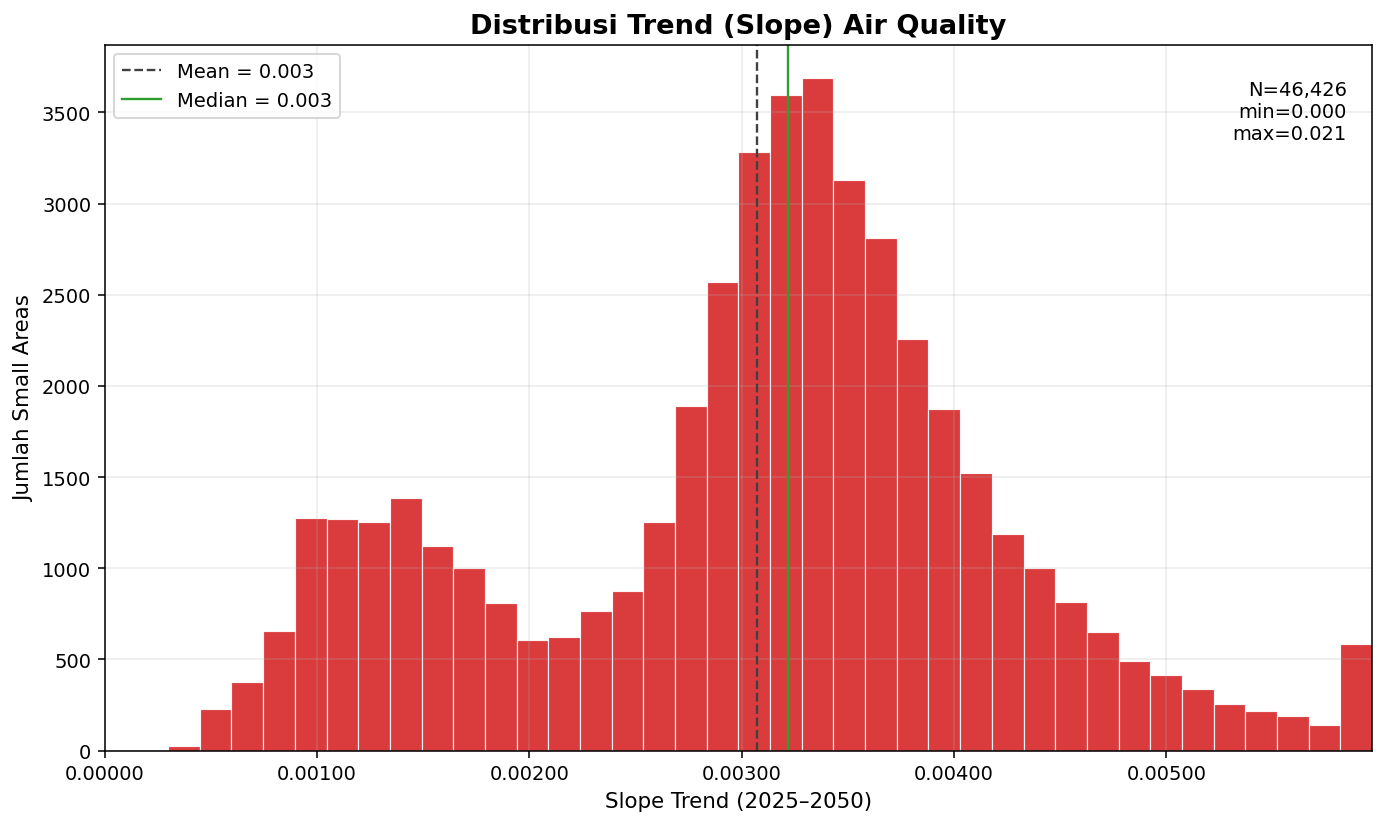

In [21]:
hist_pretty(
    df_master["slope_trend"],
    title="Distribusi Trend (Slope) Air Quality",
    xlabel="Slope Trend (2025–2050)",
    ylabel="Jumlah Small Areas",
    bins=40,
    clip_q=0.99,
    fmt="{x:,.5f}",
    bar_color=COL["red"]
)


### Histogram Gap

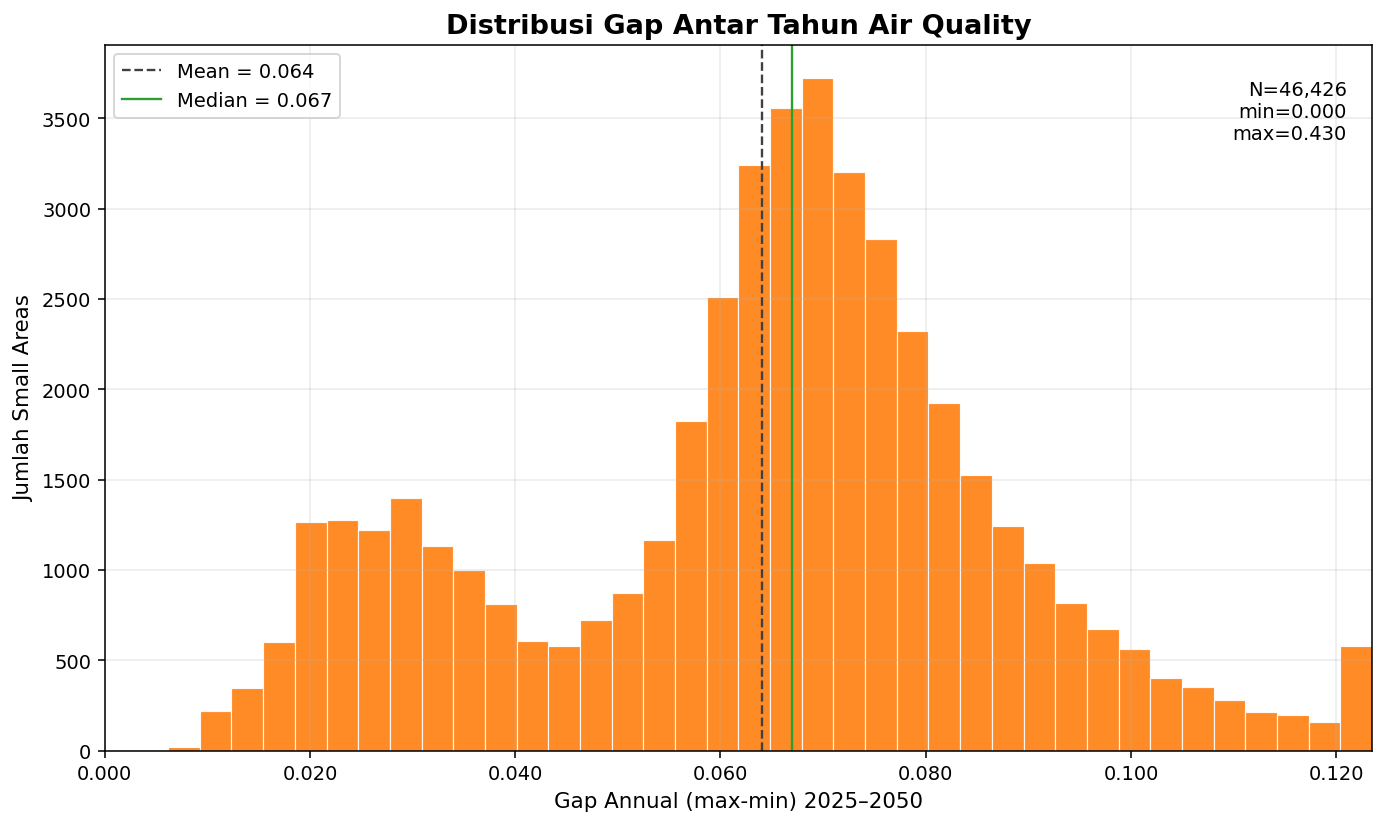

In [22]:
hist_pretty(
    df_master["gap_annual"],
    title="Distribusi Gap Antar Tahun Air Quality",
    xlabel="Gap Annual (max-min) 2025–2050",
    ylabel="Jumlah Small Areas",
    bins=40,
    clip_q=0.99,
    fmt="{x:,.3f}",
    bar_color=COL["orange"]
)
